#Importing libraries

In [ ]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import  seaborn  as  sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
os.environ['KAGGLE_USERNAME']=  "jyotiaggarwal2"
os.environ['KAGGLE_KEY']=  "7b2a1a1b5c224e6325824c621e0025c4"
!kaggle datasets download -d deepcontractor/supreme-court-judgment-prediction

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 112MB/s]


In [ ]:
!unzip supreme-court-judgment-prediction

Archive:  supreme-court-judgment-prediction.zip
  inflating: justice.csv             


#Reading dataset


In [ ]:
data=pd.read_csv('/content/justice.csv',encoding='latin',)

In [ ]:
data.head()

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment


In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'name', 'href', 'docket', 'term', 'first_party',
       'second_party', 'facts', 'facts_len', 'majority_vote', 'minority_vote',
       'first_party_winner', 'decision_type', 'disposition', 'issue_area'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0             int64
ID                     int64
name                  object
href                  object
docket                object
term                  object
first_party           object
second_party          object
facts                 object
facts_len              int64
majority_vote          int64
minority_vote          int64
first_party_winner    object
decision_type         object
disposition           object
issue_area            object
dtype: object

#DATA PREPROCESSING

Managing null and duplicate values if any

In [ ]:
data.isna().sum()

Unnamed: 0              0
ID                      0
name                    0
href                    0
docket                  0
term                    0
first_party             1
second_party            1
facts                   0
facts_len               0
majority_vote           0
minority_vote           0
first_party_winner     15
decision_type           7
disposition            72
issue_area            142
dtype: int64

In [ ]:
print(data.duplicated().sum())

0


In [ ]:
data.dropna(inplace=True)

#Removing unwanted columns

In [ ]:
data=data.drop(columns=['first_party','second_party'])

In [ ]:
data.isna().sum()

Unnamed: 0            0
ID                    0
name                  0
href                  0
docket                0
term                  0
facts                 0
facts_len             0
majority_vote         0
minority_vote         0
first_party_winner    0
decision_type         0
disposition           0
issue_area            0
dtype: int64

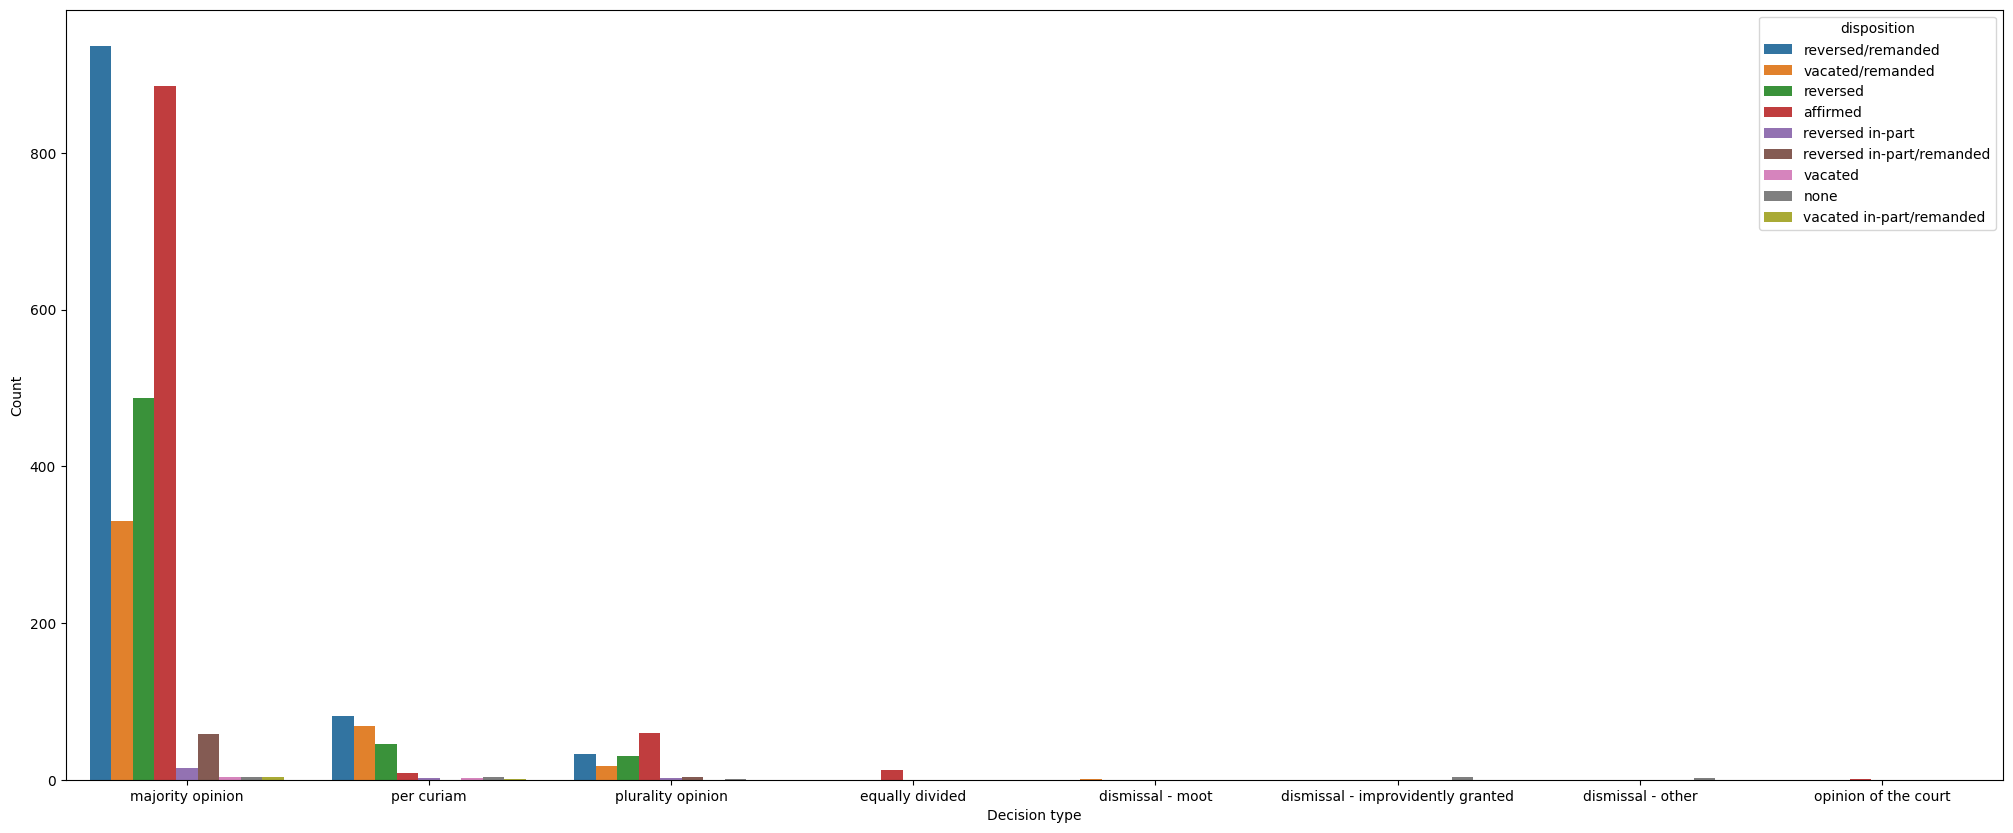

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='disposition', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

The above graph shows the distribution of decision type.It shows that the most of cases were in favour of majority opinion.

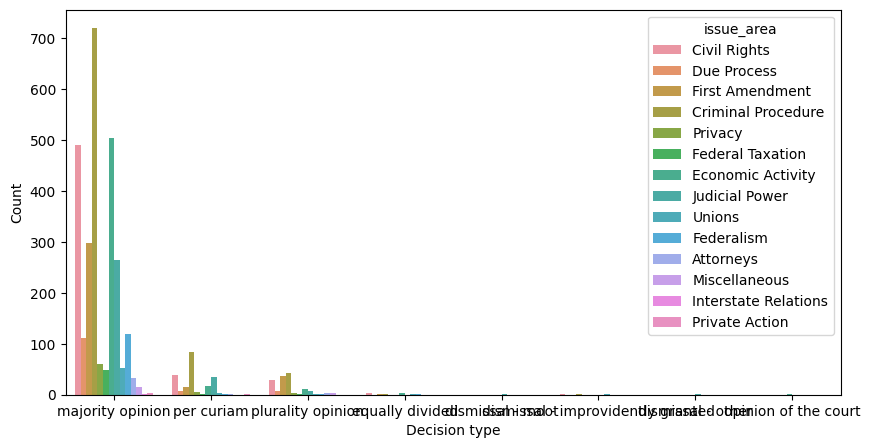

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='decision_type', hue='issue_area', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

The above graph shows the distribution of decision type and the distribution of number of cases in each decision type.In the majority opinion decision type,the number of cases with each issue area are comparatively larger than that for other decision types.The number of cases of criminal procedure are the highest in different decision types especially forr majority opinion.

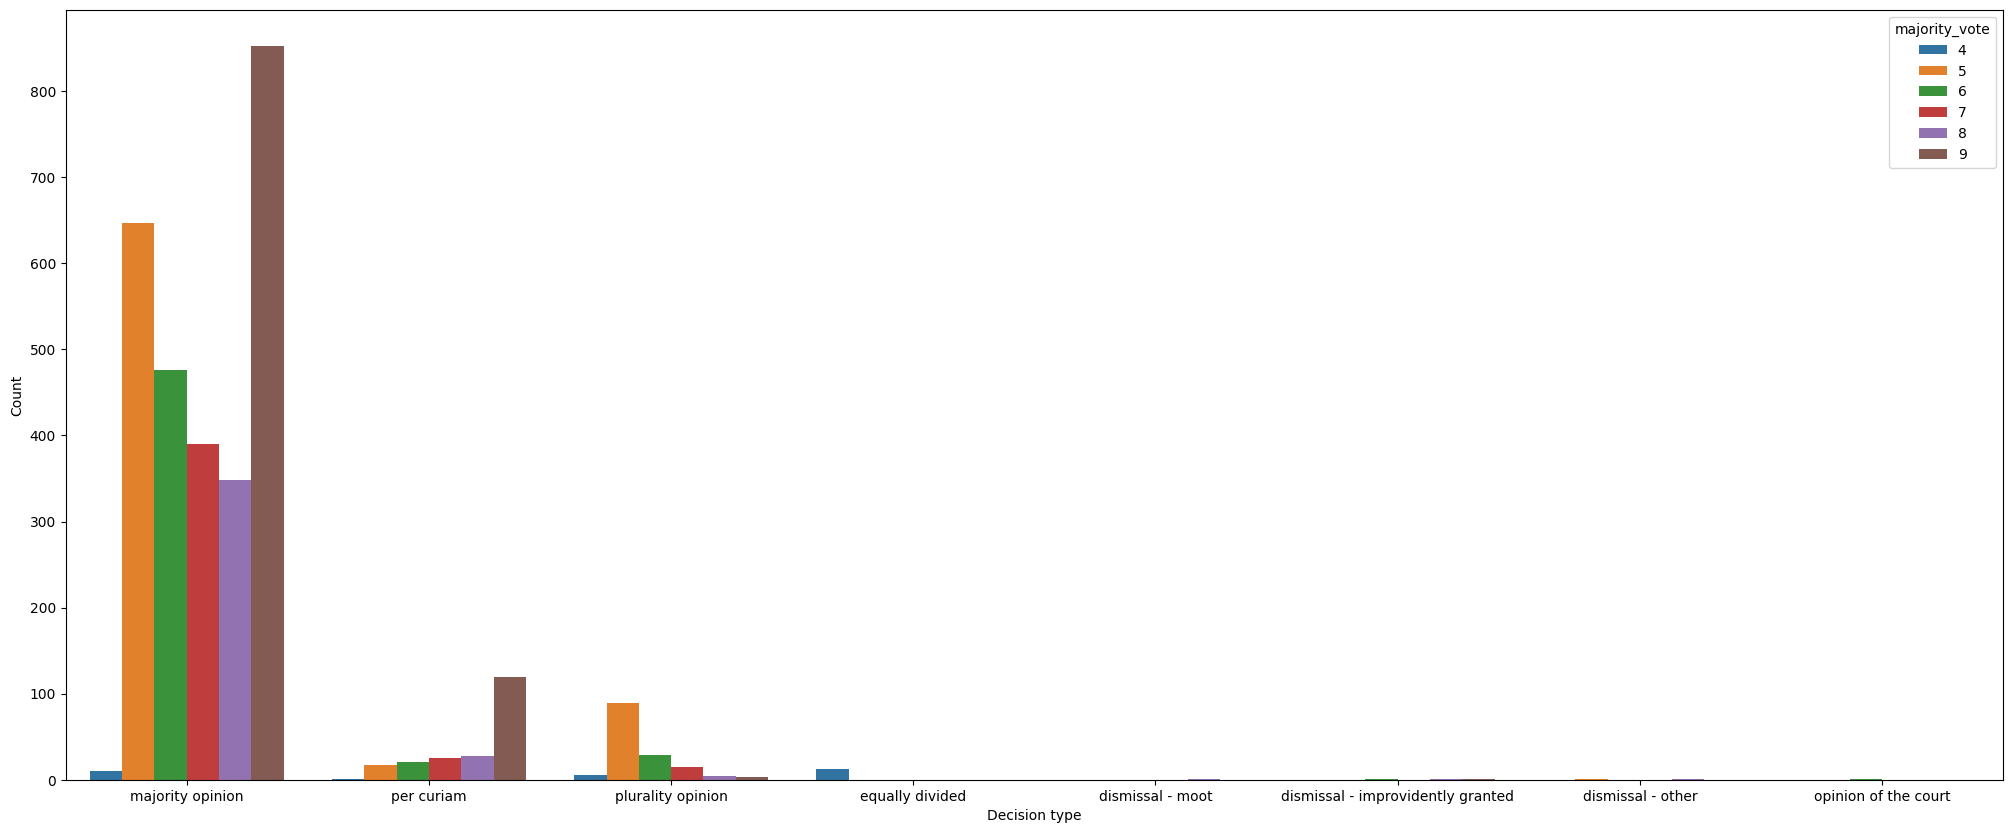

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='majority_vote', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

The above graph shows the variation of the majority votes for each decision type.

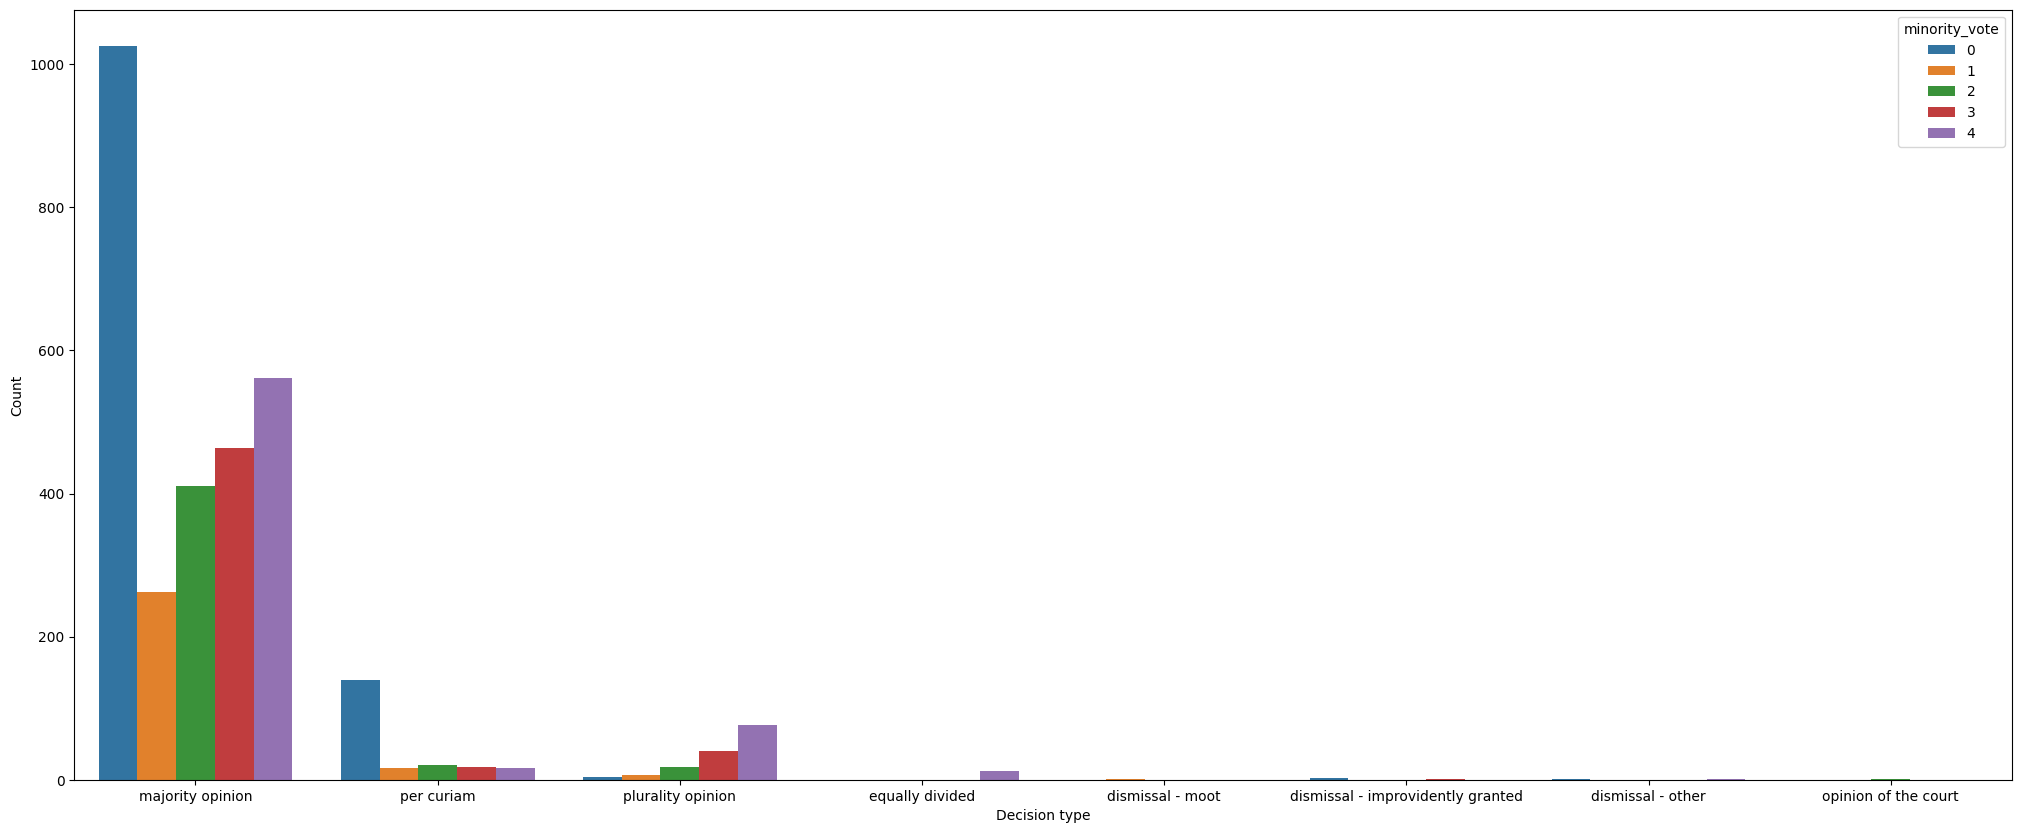

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='decision_type', hue='minority_vote', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

The above graph shows how minority votes varies in each decision type

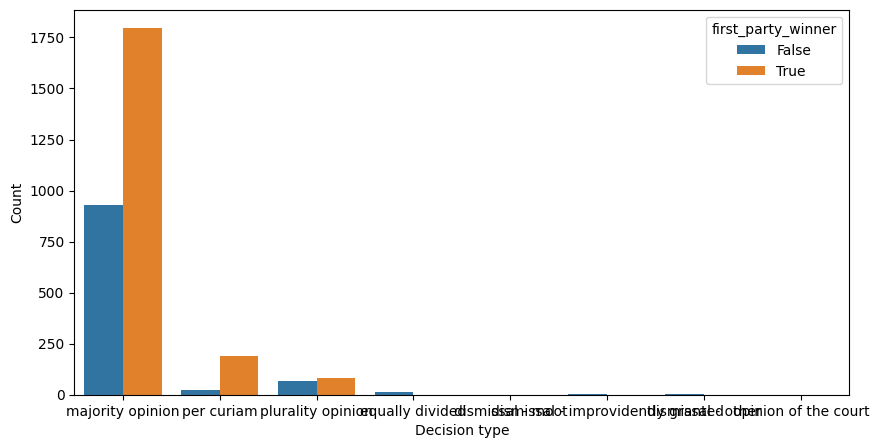

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='decision_type', hue='first_party_winner', data=data)
plt.xlabel("Decision type")
plt.ylabel("Count")
plt.show()

The above graph shows number of cases of each decision type in which either first party is winner or not.In all the decision types the first party is the winner as can be seen from the orange bar in each decision type

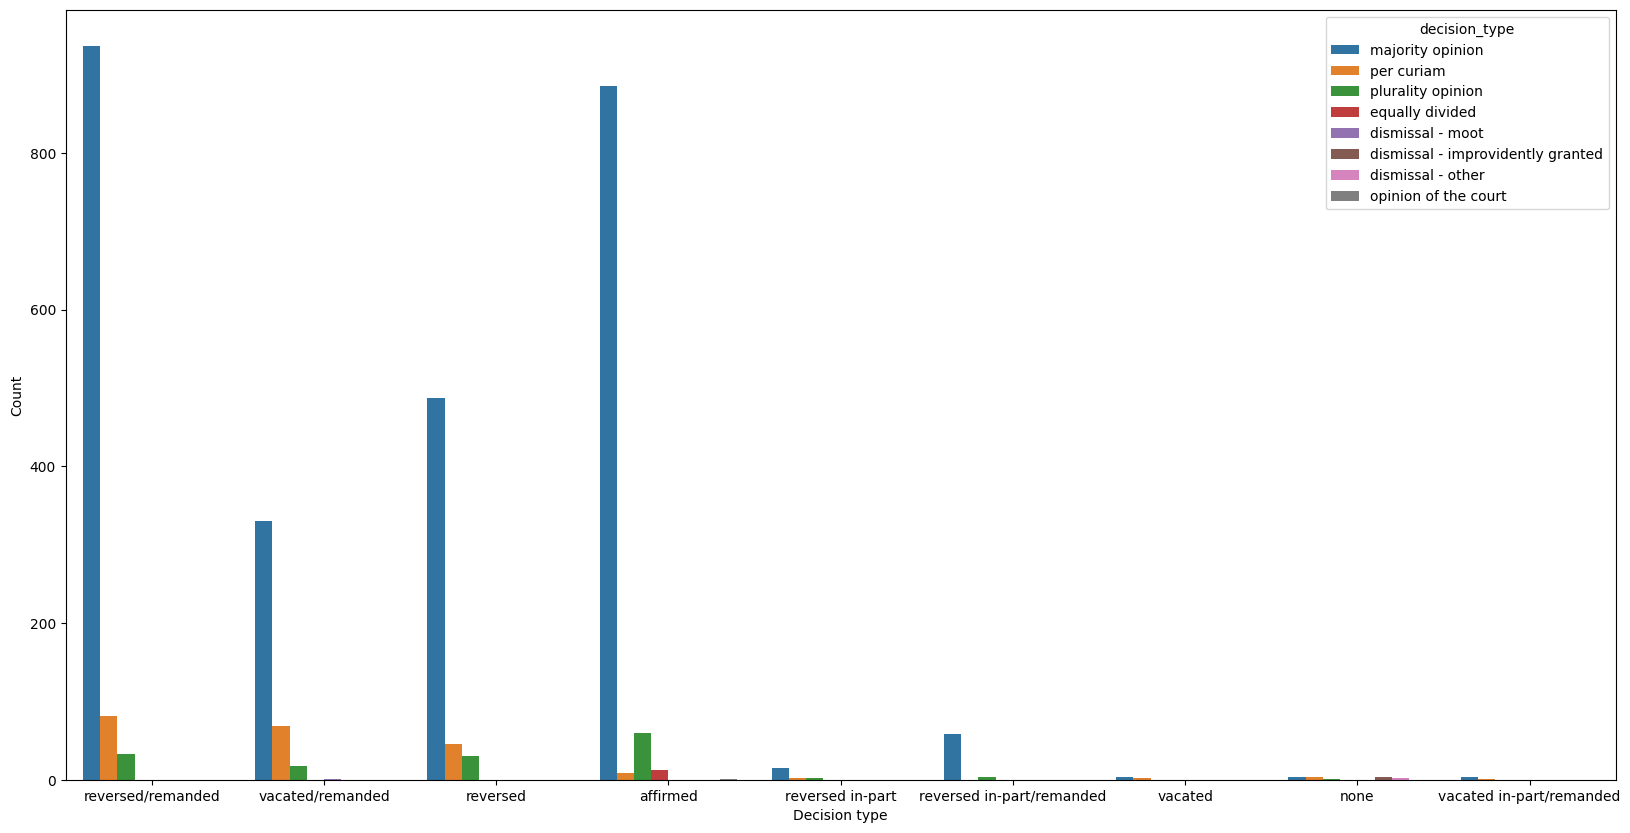

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='disposition', hue='decision_type', data=data)
plt.xlabel("Disposiion")
plt.ylabel("Count")
plt.show()

The above graph shows the variation of each disposition with the decision type


#Splitting the data into train-test

TfidfVectorizer is a term frequency-inverse document frequency (TF-IDF) vectorization technique used in NLP.It automates the process of converting a collection of text documents into a matrix of TF-IDF features. It tokenizes the text, calculates the TF-IDF values for each term in each document, and constructs a matrix where each row represents a document and each column represents a term with its corresponding TF-IDF value.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = data['facts']

# Split the data into features (X) and target (y)
X_text = text_data.values
y = data['facts']

# Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Convert the TF-IDF matrix to a dense numpy array
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

#Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(data['first_party_winner'])

In [ ]:
data['decision_type'] = encoder.fit_transform(data['decision_type'])

In [ ]:
target=data['first_party_winner']
target.reset_index(drop=True, inplace=True)
target=encoder.fit_transform(target)
data['first_party_winner']=pd.DataFrame(target, columns=['first_party_winner'])

#Finding the accuracy using SVM model

SVM stands for Support Vector Machine, which is a machine learning algorithm used for both classification and regression tasks. It's particularly effective in scenarios where the data points are not linearly separable and need to be transformed into a higher-dimensional space to make them separable.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:

# Preprocessing
X = data['facts']
y = data['first_party_winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a support vector machine (SVM) classifier
clf = SVC()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6729776247848537


#Finding the accuracy of model using different models

#1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)
model.score(X_test_tfidf,y_test)

0.6764199655765921

Evaluaion Matrices

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       188
         1.0       0.68      1.00      0.81       393

    accuracy                           0.68       581
   macro avg       0.34      0.50      0.40       581
weighted avg       0.46      0.68      0.55       581

Confusion Matrix:
[[  0 188]
 [  0 393]]


#2. Decision Tree

Creating and training the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

model evaluation

In [ ]:
y_pred = model.predict(X_test_tfidf)
model.score(X_test_tfidf,y_test)

0.5301204819277109

Evaluation matrices

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.53


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.28      0.28      0.28       188
         1.0       0.65      0.65      0.65       393

    accuracy                           0.53       581
   macro avg       0.46      0.46      0.46       581
weighted avg       0.53      0.53      0.53       581

Confusion Matrix:
[[ 52 136]
 [137 256]]


#CONCLUSION

The accuracy of this dataset is calculated using 3 models i.e. SVM, Naive Bayes and Decision Trees.The accuracy calculated using SVM and Naive Bayes is same that is 67 percent and is higher than that from Decision trees.This model has fairly good accuracy but not that high.  